In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [59]:
train = pd.read_csv("../input/titanic/train.csv")

In [60]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


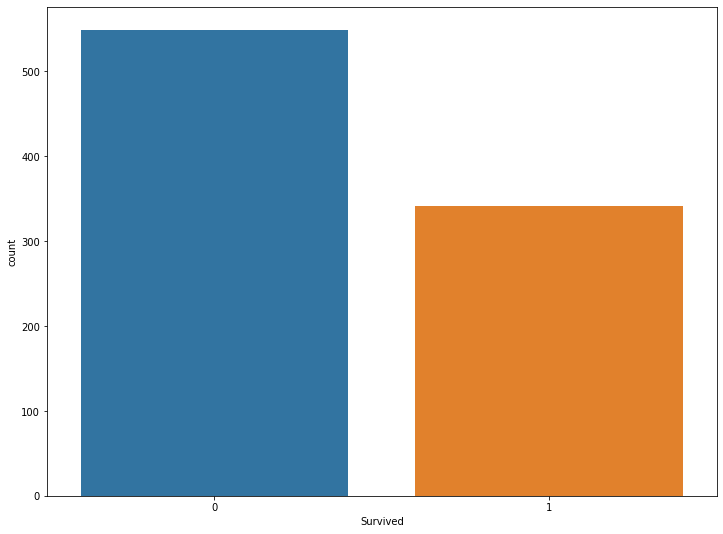

In [62]:
sns.countplot(x=train['Survived'], data=train)
plt.show()

In [63]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [64]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Sex', ylabel='count'>

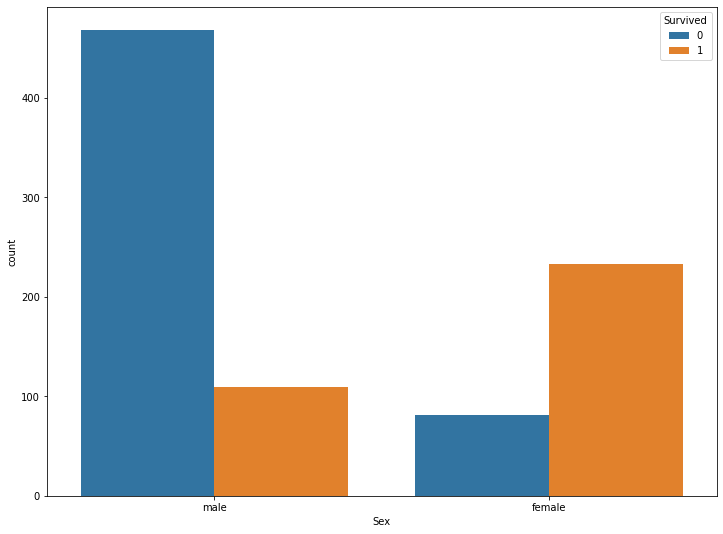

In [65]:
sns.countplot(x='Sex', hue='Survived', data=train)

In [66]:
train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [67]:
train.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


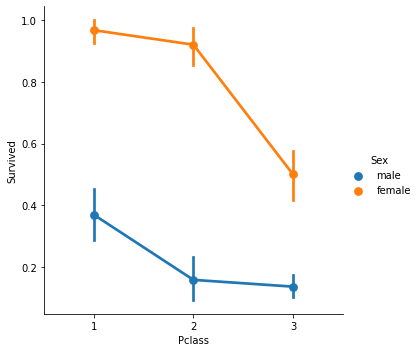

In [68]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train)

In [69]:
print("Oldest Person Age ", train["Age"].max())
print("Youngest Person Age ", train["Age"].min())
print("Average Person Age ", train["Age"].mean())
print("Median Person Age ", train["Age"].median())

Oldest Person Age  80.0
Youngest Person Age  0.42
Average Person Age  29.69911764705882
Median Person Age  28.0


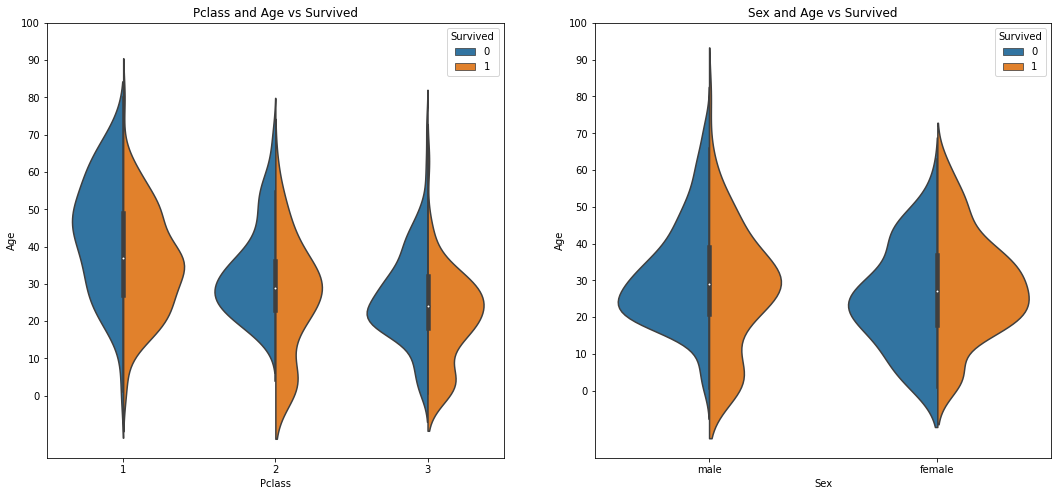

In [70]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [71]:
train['Initial'] = train['Name'].str.extract('([A-Za-z]+)\.')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [73]:
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [74]:
train.groupby(['Initial']).agg({'Age': ['mean', 'max', 'min', 'count'], 'SibSp': ['mean', 'max', 'min']})

Age                        SibSp        
               mean   max    min count      mean max min
Initial                                                 
Capt      70.000000  70.0  70.00     1  1.000000   1   1
Col       58.000000  60.0  56.00     2  0.000000   0   0
Countess  33.000000  33.0  33.00     1  0.000000   0   0
Don       40.000000  40.0  40.00     1  0.000000   0   0
Dr        42.000000  54.0  23.00     6  0.571429   2   0
Jonkheer  38.000000  38.0  38.00     1  0.000000   0   0
Lady      48.000000  48.0  48.00     1  1.000000   1   1
Major     48.500000  52.0  45.00     2  0.000000   0   0
Master     4.574167  12.0   0.42    36  2.300000   8   0
Miss      21.773973  63.0   0.75   146  0.714286   8   0
Mlle      24.000000  24.0  24.00     2  0.000000   0   0
Mme       24.000000  24.0  24.00     1  0.000000   0   0
Mr        32.368090  80.0  11.00   398  0.288201   8   0
Mrs       35.898148  63.0  14.00   108  0.696000   3   0
Ms        28.000000  28.0  28.00     1  0.000000   0   0
Rev       43.166667  57.0  27.00     6  0.166667   1   0
Sir       49.000000  49.0  49.00     1  1.000000   1   1

In [75]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [76]:
train.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [77]:
for initial in train['Initial'].unique():
    train.loc[(train['Age'].isnull()) & (train['Initial'] == initial), 'Age'] = round(train[train['Initial']==initial]['Age'].mean(),0)

In [78]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


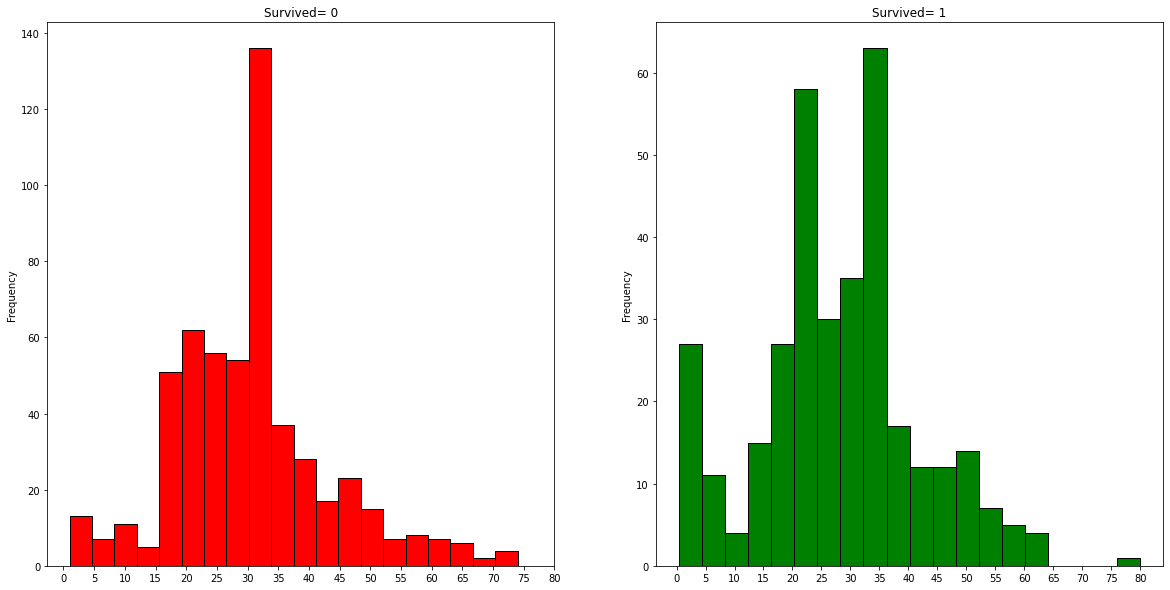

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

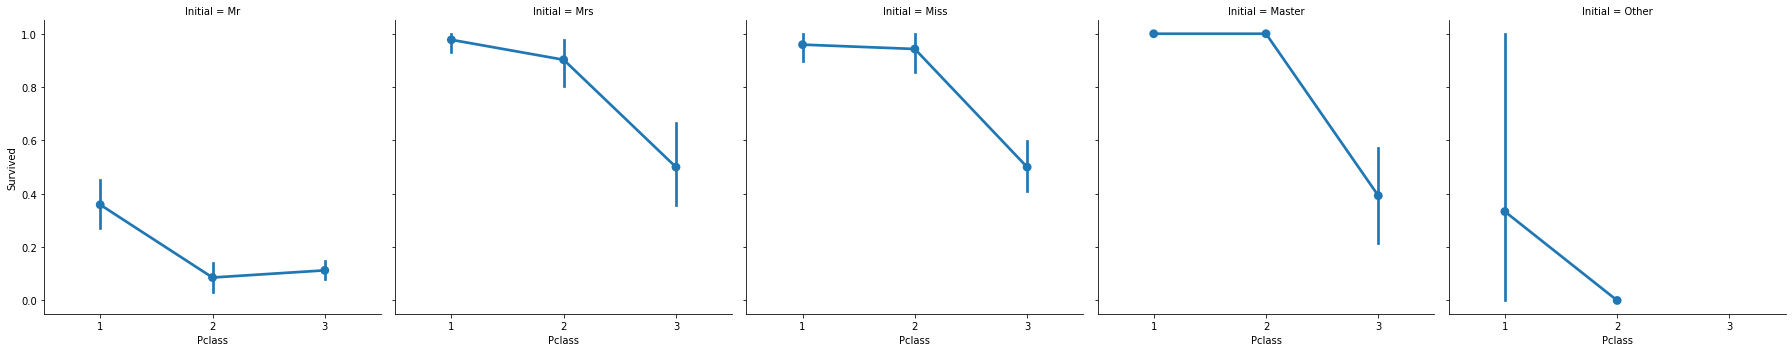

In [81]:
sns.catplot(x='Pclass',y='Survived',col='Initial', kind='point', data=train)
plt.show()

In [82]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [83]:
train['Embarked'].fillna('S',inplace=True)

In [84]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

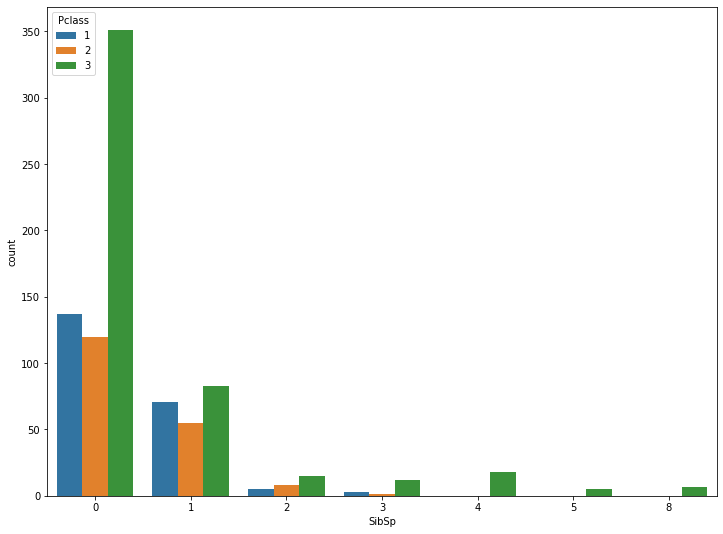

In [85]:
sns.countplot(x='SibSp', hue='Pclass', data=train)

In [86]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [87]:
pd.crosstab(train.Parch,[train.SibSp, train.Survived]).style.background_gradient(cmap='summer_r')

In [88]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


In [89]:
train['FreeRide'] = 0
train.loc[train['Fare']==0, 'FreeRide'] = 1

<AxesSubplot:>

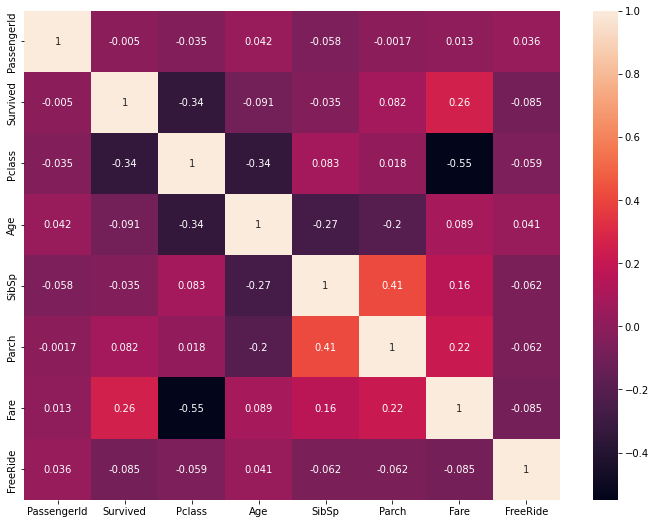

In [90]:
sns.heatmap(train.corr(), annot=True)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FreeRide
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [92]:
tixs = train.groupby(['Ticket'])['Name'].count().reset_index().sort_values(by='Name', ascending=False).rename(columns={'Name': 'Count'})

In [93]:
train = train.merge(tixs, on='Ticket', how='left')

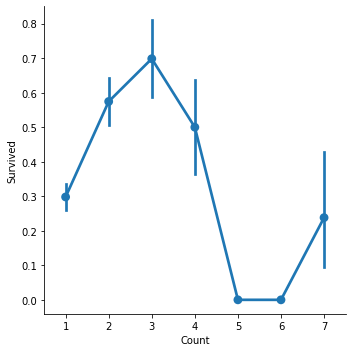

In [94]:
sns.catplot(x='Count', y='Survived', data=train, kind='point')

In [95]:
train.rename(columns={'Count': 'Ticket_Count'}, inplace=True)

In [96]:
train['Age_Range']=pd.qcut(train['Age'],6)

train.groupby(['Age_Range'])['Survived'].mean()

Age_Range
(0.419, 19.0]    0.482143
(19.0, 24.0]     0.409396
(24.0, 30.0]     0.363636
(30.0, 33.0]     0.218391
(33.0, 40.5]     0.491667
(40.5, 80.0]     0.371622
Name: Survived, dtype: float64

In [97]:
train['Age_band']=0
train.loc[(train['Age']>19)&(train['Age']<=24),'Age_band']=1
train.loc[(train['Age']>24)&(train['Age']<=30),'Age_band']=2
train.loc[(train['Age']>30)&(train['Age']<=33),'Age_band']=3
train.loc[(train['Age']>33)&(train['Age']<=40),'Age_band']=4
train.loc[train['Age']>40,'Age_band']=5

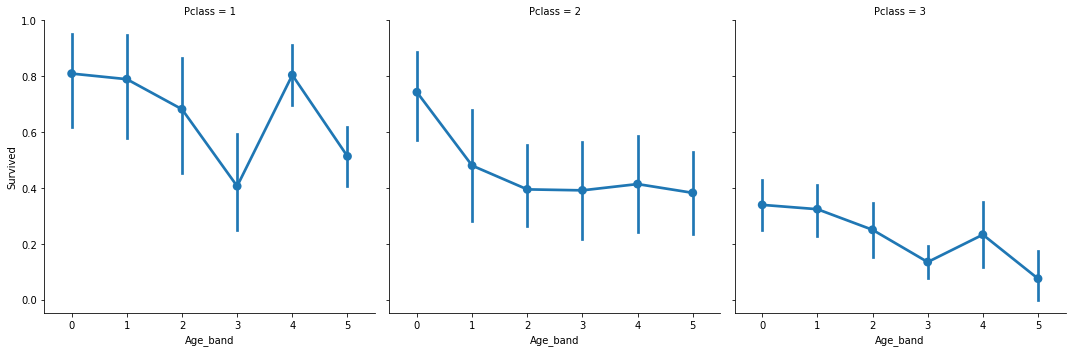

In [98]:
sns.catplot(x='Age_band',y='Survived',data=train,col='Pclass', kind='point')
plt.show()

In [99]:
train['Family_Size']=train['Parch']+train['SibSp']#family size
train['Alone']=0
train.loc[train['Family_Size']==0,'Alone']=1#Alone

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FreeRide,Ticket_Count,Age_Range,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,"(19.0, 24.0]",1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,1,"(33.0, 40.5]",4,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,"(24.0, 30.0]",2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,2,"(33.0, 40.5]",4,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,"(33.0, 40.5]",4,0,1


In [101]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

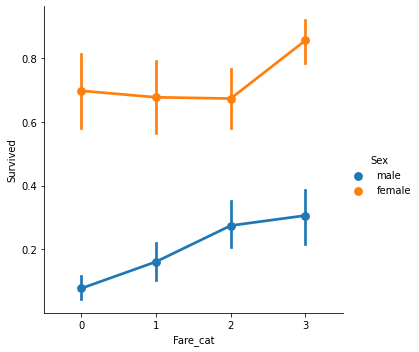

In [102]:
sns.catplot(x='Fare_cat',y='Survived',data=train,hue='Sex', kind='point')
plt.show()

In [103]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)

In [104]:
train.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Age_Range'], axis=1, inplace=True)

In [105]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,FreeRide,Ticket_Count,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,S,Mr,0,1,1,1,0,0
1,1,1,1,1,0,C,Mrs,0,1,4,1,0,3
2,1,3,1,0,0,S,Miss,0,1,2,0,1,1
3,1,1,1,1,0,S,Mrs,0,2,4,1,0,3
4,0,3,0,0,0,S,Mr,0,1,4,0,1,1


In [106]:
train = pd.get_dummies(train)

In [107]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,FreeRide,Ticket_Count,Age_band,Family_Size,Alone,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,3,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0
1,1,1,1,1,0,0,1,4,1,0,3,1,0,0,0,0,0,1,0
2,1,3,1,0,0,0,1,2,0,1,1,0,0,1,0,1,0,0,0
3,1,1,1,1,0,0,2,4,1,0,3,0,0,1,0,0,0,1,0
4,0,3,0,0,0,0,1,4,0,1,1,0,0,1,0,0,1,0,0


<AxesSubplot:>

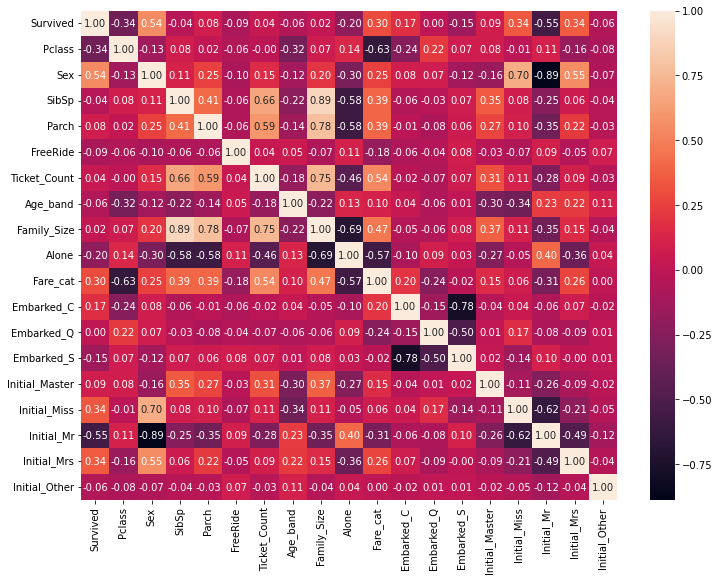

In [108]:
sns.heatmap(train.corr(), annot=True, fmt=".2f")

In [109]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix, classification_report #for confusion matrix
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import RobustScaler

In [110]:
def model_training(model, X_train, X_test, y_train, y_test, kfold, cv=False):
    if cv:
        scores = cross_validate(model, X_train, y_train, cv = kfold, scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
        acc = scores['test_accuracy'].mean()
        pre = scores['test_precision'].mean()
        rec = scores['test_recall'].mean()
        f1s = scores['test_f1'].mean()
        print("Model {}, Accuracy mean {}, Precision mean {}, Recall mean {}, F1Score mean {}".format(model, acc, pre, rec, f1s))
    else:
        trained_model = model.fit(X_train, y_train)
        preds = trained_model.predict(X_test)
        print("Model name is {}".format(model))
        print(classification_report(y_test, preds))

In [111]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.25, 
                                                    random_state=42, stratify=train['Survived'])

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (668, 18)
Test values shape: (223, 18)
Train target shape: (668,)
Test target shape: (223,)


In [112]:
skf = StratifiedKFold(n_splits=5)

In [113]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), KNeighborsClassifier(), GaussianNB(), XGBClassifier()]

In [114]:
for model in models:
    model_training(model, X_train, X_test, y_train, y_test, skf, cv=False)

Model name is LogisticRegression()
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       137
           1       0.79      0.77      0.78        86

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

Model name is SVC()
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

Model name is RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       137
           1       0.71      0.69      0.70        86

    accuracy                           0.77       223
   macro avg       0.76      0.76 

In [115]:
for model in models:
    model_training(model, X_train, X_test, y_train, y_test, skf, cv=True)

Model LogisticRegression(), Accuracy mean 0.8308495118392998, Precision mean 0.8034312816035506, Recall mean 0.7421568627450981, F1Score mean 0.7711110156237904
Model SVC(), Accuracy mean 0.836819661093031, Precision mean 0.8185715854194114, Recall mean 0.7383861236802414, F1Score mean 0.7761666069936747
Model RandomForestClassifier(), Accuracy mean 0.8233419369318818, Precision mean 0.8000560534635139, Recall mean 0.7269984917043741, F1Score mean 0.7588664206935969
Model KNeighborsClassifier(), Accuracy mean 0.7964987094602177, Precision mean 0.7473441452164856, Recall mean 0.7071644042232277, F1Score mean 0.7258638926994281
Model GaussianNB(), Accuracy mean 0.4206149702614746, Precision mean 0.3968080481658876, Recall mean 0.9805429864253394, F1Score mean 0.564804545519437
Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
 

In [116]:
rbs = RobustScaler()
X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

for model in models:
    model_training(model, X_train, X_test, y_train, y_test, skf, cv=False)

Model name is LogisticRegression()
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       137
           1       0.78      0.76      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223

Model name is SVC()
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       137
           1       0.78      0.76      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223

Model name is RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       137
           1       0.70      0.64      0.67        86

    accuracy                           0.75       223
   macro avg       0.74      0.73 

In [118]:
clf1 = SVC()
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = RandomForestClassifier(random_state=42)
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

params = {'svc__C': np.arange(1,20),
          'kneighborsclassifier__n_neighbors': [1, 5, 8, 10, 12],
          'randomforestclassifier__n_estimators': [100, 300, 500, 700, 1000],
          'randomforestclassifier__criterion': ['gini', 'entropy'],
          'randomforestclassifier__max_depth': [1,3,5,10],
          'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10],
          'randomforestclassifier__min_samples_leaf': [1, 4, 6, 8, 10, 12],
          'randomforestclassifier__max_samples': [0.5, 1.0],
          'meta_classifier__C': np.arange(1,20)}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=skf,
                    refit=True,
                    scoring = 'f1')

grid.fit(rbs.transform(train.drop('Survived', axis=1)), train['Survived'])

# acc = grid['test_accuracy'].mean()
# pre = grid['test_precision'].mean()
# rec = grid['test_recall'].mean()
f1s = grid['test_f1'].mean()
print("F1Score mean {}".format(f1s))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

KeyboardInterrupt: 